<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.503 · Programación para la ciencia de datos</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Programación para la ciencia de datos
============================

--- 

Unidad 5: Optimización de código: programación concurrente y paralela
-----------------------------------------------------

---

### Instrucciones de uso

Este documento es un notebook interactivo que intercala explicaciones más bien teóricas de conceptos de programación con fragmentos de código ejecutables. Para aprovechar las ventajas que aporta este formato, se recomienda, en primer lugar, leer las explicaciones y el código que os proporcionamos. De esta manera tendréis un primer contacto con los conceptos que se exponen. Ahora bien, **¡la lectura es solo el principio!** Una vez que hayáis leído el contenido proporcionado, no olvidéis ejecutar el código proporcionado y modificarlo para crear variantes, que os permitan comprobar que habéis entendido su funcionalidad y explorar los detalles de la implementación. Por último, se recomienda también consultar la documentación enlazada para explorar con más profundidad las funcionalidades de los módulos presentados.

In [1]:
%load_ext pycodestyle_magic

In [2]:
%pycodestyle_on

### Introducción

En esta unidad veremos cómo podemos optimizar los programas en Python, programando versiones que aprovechen la concurrencia de los procesadores y/o el paralelismo que ofrecen las arquitecturas actuales. Esto nos permitirá, diseñar e implementar código que aproveche los recursos disponibles en nuestra máquina para realizar la tarea para la que ha sido diseñado.

En primer lugar, presentaremos los conceptos básicos de concurrencia y paralelismo, y haremos una pequeña descripción de los *threads* y los procesos.

Seguidamente, se explica cómo podemos implementar código *multithreaded* en Python, y cuándo será beneficioso hacerlo. Veremos también qué problemas se pueden producir de la ejecución con múltiples hilos, y algunas de las herramientas que nos ofrece Python para evitarlos.

Después nos centraremos en la creación de programas multiproceso. De nuevo, explicaremos en qué situaciones puede ser útil que un programa sea multiproceso, veremos cómo implementar este tipo de programas desde Python, y detallaremos algunas alternativas para comunicar diferentes procesos.

A continuación se incluye la tabla de contenidos, que podéis utilizar para navegar por el documento:

<ul style="list-style-type:none">
<li> <a href='#1.--Introducción'> 1. Introducción </a> </li>
<li> <a href="#2.--Uso-de-múltiples-threads-en-Python"> 2. Uso de múltiples threads en Python </a> </li>
    <ul style="list-style-type:none">
<li> <a href='#2.1.--Introducción'> 2.1. Introducción </a> </li>
<li> <a href="#2.2.--Optimización-de-código-usando-threads-en-Python"> 2.2. Optimización de código usando threads en Python </a> </li>
<li> <a href="#2.3.--Interferencias-entre-threads"> 2.3. Interferencias entre threads </a> </li>
        <ul style="list-style-type:none">
<li> <a href='#2.3.1.--Deadlocks'> 2.3.1. Deadlocks </a> </li>
        </ul>
    </ul>
<li> <a href="#3.--Uso-de-múltiples-procesos-en-Python"> 3. Uso de múltiples procesos en Python </a> </li>
    <ul style="list-style-type:none">
<li> <a href="#3.1.--Introducción"> 3.1. Introducción </a> </li>
<li> <a href="#3.2.--Optimización-de-código-usando-multiproceso-en-Python"> 3.2. Optimización de código usando multiproceso en Python </a> </li>
<li> <a href="#3.3.--Compartición-de-datos-y-coordinación-de-procesos"> 3.3. Compartición de datos y coordinación de procesos </a> </li>
        <ul style="list-style-type:none">
<li> <a href='#3.3.1.--Variables-compartidas'> 3.3.1. Variables compartidas </a> </li>
<li> <a href='#3.3.2.--Comunicación-entre-procesos'> 3.3.2. Comunicación entre procesos </a> </li>
        </ul>
    </ul>
<li> <a href='#4.--Ejercicios-para-practicar'> 4. Ejercicios para practicar </a> </li>
    <ul style="list-style-type:none">
<li> <a href='#4.1.--Soluciones-a-los-ejercicios-para-practicar'> 4.1. Soluciones a los ejercicios para practicar </a> </li>
    </ul>
<li> <a href='#5.--Bibliografía'> 5. Bibliografía </a> </li>
    <ul style="list-style-type:none">
<li> <a href='#5.1.--Bibliografía-básica'> 5.1. Bibliografía básica </a> </li>
<li> <a href='#5.2.--Bibliografía-adicional---Ampliación-de-conocimientos'> 5.2. Bibliografía adicional </a> </li>
    </ul>
</ul>

**Importante**:

**Nota 1:** Antes de ejecutar el código de este notebook, hay que instalar una librería adicional. Para instalar librerías en Python, utilizaremos `pip`, el instalador de paquetes de Python.

Abrid ahora una consola y ejecutad la siguiente instrucción, que instala el paquete `sympy`:

```
sudo pip3 install sympy
```

Solo es necesario realizar este paso **una única vez**. Una vez que tengáis instalada la librería, podréis ejecutar la totalidad del notebook en la máquina donde hayáis realizado la instalación.

# 1.- Introducción

Hasta ahora hemos creado programas que se ejecutan **secuencialmente**: siguiendo el flujo de ejecución definido por el código, las instrucciones se ejecutaban siempre una detrás de la otra, esperando a que finalice cada instrucción para empezar a ejecutar la siguiente. Ahora bien, por un lado, la mayoría de ordenadores modernos disponen de varias CPUs, que permiten ejecutar varios flujos de ejecución al mismo tiempo. Por otra parte, aunque sólo dispongamos de una única CPU, a veces será más eficiente ir intercalando la ejecución de varios hilos, en vez de ir esperando a que finalice cada uno de ellos para ejecutar el siguiente. Es el caso, por ejemplo, de hilos de ejecución que esperan a eventos externos: mientras uno de los hilos se encuentra esperando al evento externo, un segundo hilo puede aprovechar la CPU para hacer cálculos.

Así, en este *notebook* describiremos cómo podemos realizar programación **concurrente** (en la que diversas tareas pueden avanzar simultáneamente, sin necesidad de esperar a que finalice una para iniciar la siguiente) y programación **paralela** (en la cual varias tareas se ejecutan a la vez) en Python. La imagen siguiente muestra el concepto clave que distingue la programación secuencial, la concurrente y la paralela:

![concurrencia](img/concurrencia_ib.png)


A continuación describiremos cómo se puede implementar la concurrencia y el paralelismo en Python utilizando *threads* y procesos.

Un **proceso** es un programa que se ha cargado en memoria para su ejecución, junto con los recursos que necesita para ejecutarse. Estos recursos contienen los registros (que pueden contener una instrucción, una dirección, un dato, etc.); el contador de programa (un registro especial que almacena un puntero a la instrucción que se está ejecutando); y la pila y el *heap* (con el hilo de llamadas que han ido sucediendo y las variables que se han ido creando).

Un **hilo de ejecución** o _**thread**_ es una unidad de ejecución dentro de un proceso. Un proceso siempre tiene al menos un *thread*, y puede tener varios de ellos.

Cuando un proceso se crea, se le asignan los recursos necesarios para ejecutarse (entre los que está la memoria donde se almacenan las variables). Así pues, cada nuevo proceso dispondrá de su espacio de memoria (que se asigna en el momento de la creación).

En cambio, la creación de un nuevo *thread* en un proceso no requiere de la asignación de nuevos recursos: cada *thread* de ejecución de un proceso compartirá la memoria ya asignada al proceso donde se ha creado. Los *threads* sí que tendrán algún recurso propio, pero este será mínimo y se limitará a los datos básicos que permitan mantener la ejecución (por ejemplo, tendrán su propio contador de programa que indique qué instrucción están ejecutando).

Esto tiene dos implicaciones claras. Por un lado, tanto la creación de nuevos procesos como los cambios de contexto entre procesos son más costosos que entre *threads* (por el *overhead* que se produce al tener que gestionar la memoria). Por otra parte, los *threads* podrán tener problemas de interferencia al compartir espacios de memoria, pero será fácil pasar datos de un *thread* a otro justamente por esta compartición; en cambio, será más costoso comunicar procesos entre ellos, ya que diferentes procesos tendrán espacios de memoria diferentes.

En esta introducción se ha simplificado un poco el detalle de cómo funciona la gestión de memoria en la ejecución de programas, ya que no es el objetivo principal de este módulo. Si estáis interesados en explorar en más detalle que diferencía, a nivel de sistema operativo, los *threads* de los procesos, os recomendamos visitar los enlaces siguientes ([1](https://www.youtube.com/watch?v=TRH2HupGkgI), [2](https://www.youtube.com/watch?v=PBb0NRvo96s), [3](https://www.youtube.com/watch?v=Dhf-DYO1K78), [4](https://www.youtube.com/watch?v=3WmNGc9qP0g), [5](https://www.youtube.com/watch?v=X668LfXObaM)).

# 2.- Uso de múltiples *threads* en Python

## 2.1.- Introducción

En esta sección veremos cómo podemos implementar *threads* en Python utilizando el módulo [`threading`](https://docs.python.org/3.8/library/threading.html).

El módulo [`threading`](https://docs.python.org/3.8/library/threading.html) implementa la clase [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread) que representa un flujo de ejecución que corre en un *thread* individual. Con el fin de crear varios hilos de ejecución dentro de nuestro programa, crearemos pues diferentes instancias de la clase [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread), especificando qué función han de ejecutar y con qué parámetros.

Una vez creada la instancia de [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread), podemos iniciar su ejecución llamando al método [`start`](https://docs.python.org/3.8/library/threading.html#threading.Thread.start). Para controlar la finalización de los diferentes hilos de ejecución desde el hilo principal, utilizaremos el método [`join`](https://docs.python.org/3.8/library/threading.html#threading.Thread.join) de cada *thread*: este método bloquea la ejecución del hilo donde se ejecuta hasta que finaliza el *thread* sobre el que se ha llamado.

A continuación se implementa un ejemplo sencillo de ejecución *multithreaded* con el módulo [`threading`](https://docs.python.org/3.8/library/threading.html). Definimos una función `random_wait` que espera un tiempo aleatorio entre uno y cuatro segundos, y que será la función que ejecutarán los diferentes hilos. El código principal crea tres instancias de la clase [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread), que ejecutan la función `random_wait`, y las inicia (con `thread.start()`). Después, el hilo principal espera a que finalicen cada uno de los tres *threads*, llamando l método [`join`](https://docs.python.org/3.8/library/threading.html#threading.Thread.join) de cada uno de ellos.


In [2]:
from threading import Thread
from random import randint
from time import sleep
import logging
import sys


def random_wait(t_index):
    """
    Espera un temps aleatori entre 1 i 4 segons.
    """
    logging.info("[T{}]\tStarted".format(t_index))
    t = randint(1, 4)
    logging.info("[T{}]\tSleeping {} seconds...".format(t_index, t))
    sleep(t)
    logging.info("[T{}]\tEnd".format(t_index))


# Configura el logging
log_format = '[%(process)d]\t%(asctime)s %(levelname)s: %(message)s'
logging.basicConfig(format=log_format, level=logging.INFO, datefmt="%H:%M:%S",
                    handlers=[logging.StreamHandler(sys.stdout)])

# Crea 3 threads que ejecutan la función random_wait y
# los inicia
threads = []
num_threads = 3
for i in range(num_threads):
    logging.info("[M]\tCreating thread {}".format(i))
    # Creamos el thread
    thread = Thread(target=random_wait, args=(i,))
    threads.append(thread)
    # Ejecutamos el thread
    thread.start()

# Espera a que los 3 threads finalicen
for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")

[3372]	15:17:00 INFO: [M]	Creating thread 0
[3372]	15:17:00 INFO: [T0]	Started
[3372]	15:17:00 INFO: [M]	Creating thread 1
[3372]	15:17:00 INFO: [T0]	Sleeping 4 seconds...
[3372]	15:17:00 INFO: [T1]	Started
[3372]	15:17:00 INFO: [M]	Creating thread 2
[3372]	15:17:00 INFO: [T1]	Sleeping 1 seconds...
[3372]	15:17:00 INFO: [T2]	Started
[3372]	15:17:00 INFO: [M]	Waiting to join thread 0
[3372]	15:17:00 INFO: [T2]	Sleeping 1 seconds...
[3372]	15:17:01 INFO: [T1]	End
[3372]	15:17:01 INFO: [T2]	End
[3372]	15:17:04 INFO: [T0]	End
[3372]	15:17:04 INFO: [M]	Thread 0 joined!
[3372]	15:17:04 INFO: [M]	Waiting to join thread 1
[3372]	15:17:04 INFO: [M]	Thread 1 joined!
[3372]	15:17:04 INFO: [M]	Waiting to join thread 2
[3372]	15:17:04 INFO: [M]	Thread 2 joined!
[3372]	15:17:04 INFO: [M]	DONE!


En primer lugar, tened en cuenta que la función `random_wait` recibe un parámetro que usamos para identificar cada uno de los *threads*. Para facilitar el seguimiento de la ejecución, mostramos este identificador entre corchetes cada vez que mostramos un mensaje de *log*.

En segundo lugar, notad como los diferentes hilos se ejecutan concurrentemente: mientras el hilo principal está creando el segundo y tercer hilos, el primer hilo creado ya se está ejecutando. Notad también como el primer hilo a iniciarse (`T0`) no tiene porque ser el primero en finalizar, ya que esto dependerá de las esperas aleatorias que se producen en cada hilo.

En tercer lugar, es interesante notar que no hemos utilizado la instrucción `print` para mostrar los mensajes que informan de qué parte del código se está ejecutando, sino que hemos utilizado el módulo [`logging`](https://docs.python.org/3.8/library/logging.html). El principal motivo para hacerlo es asegurar que los diferentes mensajes se muestran sin interrupciones y con el formato deseado, aunque diferentes hilos de ejecución estén escribiéndolos. Adicionalmente, utilizar [`logging`](https://docs.python.org/3.8/library/logging.html) nos ofrece otras funcionalidades, como el hecho de mostrar información adicional antes de cada mensaje. En el caso del fragmento de código ejecutado en la celda anterior, hemos aprovechado para mostrar el identificador del proceso, la hora, y el nivel del mensaje.

El módulo [`logging`](https://docs.python.org/3.8/library/logging.html) tiene como objetivo facilitar la creación de registros o *logs* en Python, ayudando así en el seguimiento del flujo de ejecución de los programas. Los *logs* normalmente contienen un registro de los eventos que han sucedido y permiten seguir el comportamiento de un programa, con varias finalidades. Así, por ejemplo, los *logs* pueden servir para ayudar en la detección y depuración de errores, para evaluar el rendimiento de un programa, para mostrar información adicional sobre cómo o quién lo está utilizando, etc. Este módulo es, por tanto, muy útil a la hora de hacer el seguimiento de la ejecución de código concurrente. Si queréis explorar el uso de esta librería, os recomendamos la lectura de los tutoriales oficiales (tanto el [básico](https://docs.python.org/3/howto/logging.html#logging-basic-tutorial) como el más [avanzado](https://docs.python.org/3/howto/logging.html#logging-advanced-tutorial)).


## 2.2.- Optimización de código usando *threads* en Python

No todos los programas pueden beneficiarse de la ejecución en múltiples *threads*. Por un lado, los programas que requieren conocer unos resultados anteriores para calcular los siguientes, difícilmente se ejecutarán más rápido en un entorno *multithreaded*, ya que los diferentes hilos no podrán ejecutarse concurrentemente. Por otra parte, en su versión más extendida, Python ejecuta los diferentes *threads* en un mismo procesador, por lo que la ejecución de estos es concurrente (pero no paralela). Veámoslo con un par de ejemplos.

En la celda siguiente se define la función `get_factors`, que dado un entero, en calcula su descomposición en factores primos y la devuelve:


In [3]:
from sympy import primefactors


def get_factors(t_index, value):
    """
    Retorna la factoritzación de `value` en factores primos.
    """
    logging.info("[T{}]\tStarted with input {}".format(t_index, value))
    r = primefactors(value)
    logging.info("[T{}]\tEnded with output {}".format(t_index, r))

In [4]:
# Factoriza el valor 15
get_factors(1, 15)

[3372]	15:17:04 INFO: [T1]	Started with input 15
[3372]	15:17:04 INFO: [T1]	Ended with output [3, 5]


Ahora, vamos a calcular la factorización de tres enteros utilizando la función `get_factors` de manera secuencial:


In [5]:
nums_to_factor = [5215785878052641903952977068511001599,
                  748283119772062608265951220534384001023,
                  949273031776466197045163567568010291199]

In [6]:
%%time

for _, num in enumerate(nums_to_factor):
    get_factors(1, num)

[3372]	15:17:04 INFO: [T1]	Started with input 5215785878052641903952977068511001599
[3372]	15:17:05 INFO: [T1]	Ended with output [479001599, 10888869450418352160768000001]
[3372]	15:17:05 INFO: [T1]	Started with input 748283119772062608265951220534384001023
[3372]	15:17:10 INFO: [T1]	Ended with output [68720001023, 10888869450418352160768000001]
[3372]	15:17:10 INFO: [T1]	Started with input 949273031776466197045163567568010291199
[3372]	15:17:13 INFO: [T1]	Ended with output [87178291199, 10888869450418352160768000001]
CPU times: user 8.21 s, sys: 44.9 ms, total: 8.26 s
Wall time: 9.03 s


A continuación volveremos a repetir el cálculo de la factorización de los mismos tres enteros, ejecutándolos ahora como *threads* independientes:


In [7]:
%%time
threads = []

# Crea 3 threads que ejecutan la función get_factors y
# los inicia
for i, num in enumerate(nums_to_factor):
    thread = Thread(target=get_factors, args=(i, num))
    threads.append(thread)
    thread.start()

# Espera a que los 3 threads finalicen
for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")

[3372]	15:17:13 INFO: [T0]	Started with input 5215785878052641903952977068511001599
[3372]	15:17:13 INFO: [T1]	Started with input 748283119772062608265951220534384001023
[3372]	15:17:14 INFO: [T2]	Started with input 949273031776466197045163567568010291199
[3372]	15:17:14 INFO: [M]	Waiting to join thread 0
[3372]	15:17:17 INFO: [T0]	Ended with output [479001599, 10888869450418352160768000001]
[3372]	15:17:17 INFO: [M]	Thread 0 joined!
[3372]	15:17:17 INFO: [M]	Waiting to join thread 1
[3372]	15:17:24 INFO: [T1]	Ended with output [68720001023, 10888869450418352160768000001]
[3372]	15:17:24 INFO: [M]	Thread 1 joined!
[3372]	15:17:24 INFO: [M]	Waiting to join thread 2
[3372]	15:17:24 INFO: [T2]	Ended with output [87178291199, 10888869450418352160768000001]
[3372]	15:17:24 INFO: [M]	Thread 2 joined!
[3372]	15:17:24 INFO: [M]	DONE!
CPU times: user 9.14 s, sys: 42.5 ms, total: 9.18 s
Wall time: 10.4 s


Los tiempos de ejecución de las dos versiones del código (la primera, secuencial, y la segunda, con múltiples *threads*) es muy similar (y, a menudo, la versión secuencial resulta más rápida). Esto es así porque los diferentes *threads* se ejecutan en un mismo procesador y todos ellos ejecutan código que requiere tiempo de cómputo de CPU. Por lo tanto, la posible concurrencia en la ejecución no se aprovecha, y el *overhead* que produce la gestión de los *threads* impacta negativamente en el rendimiento del código. Así pues, este es un ejemplo claro de un fragmento de código que **no** se beneficiará de una implementación con múltiples hilos de ejecución en Python.

Vemos ahora un segundo ejemplo, en el que crearemos también tres *threads*: dos de ellos se descargarán unos conjuntos de datos de Internet, y el tercero volverá a factorizar uno de los números del ejemplo anterior.

En primer lugar, definimos la función `get_url_and_write_to_disk`, que descarga el contenido de una *url* y lo guarda en el disco:


In [8]:
import requests


def get_url_and_write_to_disk(t_index, url):
    """
    Descarga el contenido de la url y lo guarda en la carpeta `data`.
    """
    logging.info("[T{}]\tStarted with url {}".format(t_index, url))
    r = requests.get(url, allow_redirects=True)
    open('data/'+str(t_index), 'wb').write(r.content)
    logging.info("[T{}]\tEnd".format(t_index))

In [9]:
urls = ["https://snap.stanford.edu/data/twitter.tar.gz",
        "https://snap.stanford.edu/data/twitter_combined.txt.gz"]

Ahora, como en el ejemplo anterior, ejecutaremos las tres tareas de manera secuencial: primero, factorizaremos el entero y, después, descargaremos los dos ficheros apuntados por las *urls* de la lista de la celda anterior:

In [27]:
%%time

get_factors(1, nums_to_factor[-1])

[3372]	15:21:00 INFO: [T1]	Started with input 949273031776466197045163567568010291199
[3372]	15:21:04 INFO: [T1]	Ended with output [87178291199, 10888869450418352160768000001]
CPU times: user 3.01 s, sys: 472 ms, total: 3.48 s
Wall time: 4.02 s


In [29]:
%%time

for url in urls:
    get_url_and_write_to_disk(1, url)

[3372]	15:25:31 INFO: [T1]	Started with url https://snap.stanford.edu/data/twitter.tar.gz
[3372]	15:25:35 INFO: [T1]	End
[3372]	15:25:35 INFO: [T1]	Started with url https://snap.stanford.edu/data/twitter_combined.txt.gz
[3372]	15:25:38 INFO: [T1]	End
CPU times: user 53.1 ms, sys: 1.26 s, total: 1.32 s
Wall time: 7.14 s


A continuación, implementamos la versión *multithreaded* del código anterior, creando tres *threads* (dos que descargarán archivos y uno que hará el cálculo de la factorización).


In [30]:
%%time

# Creamos los 3 threads que ejecutan get_factors o get_url_and_write_to_disk
# y los iniciamos
threads = []
for i in range(3):
    if i == 2:
        thread = Thread(target=get_factors, args=(i, nums_to_factor[-1]))
    else:
        thread = Thread(target=get_url_and_write_to_disk, args=(i, urls[i]))
        
    threads.append(thread)
    thread.start()

# Esperamos a que los 3 threads finalicen
for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")

[3372]	15:25:41 INFO: [T0]	Started with url https://snap.stanford.edu/data/twitter.tar.gz
[3372]	15:25:41 INFO: [T1]	Started with url https://snap.stanford.edu/data/twitter_combined.txt.gz
[3372]	15:25:41 INFO: [T2]	Started with input 949273031776466197045163567568010291199
[3372]	15:25:41 INFO: [M]	Waiting to join thread 0
[3372]	15:25:45 INFO: [T1]	End
[3372]	15:25:46 INFO: [T2]	Ended with output [87178291199, 10888869450418352160768000001]
[3372]	15:25:47 INFO: [T0]	End
[3372]	15:25:47 INFO: [M]	Thread 0 joined!
[3372]	15:25:47 INFO: [M]	Waiting to join thread 1
[3372]	15:25:47 INFO: [M]	Thread 1 joined!
[3372]	15:25:47 INFO: [M]	Waiting to join thread 2
[3372]	15:25:47 INFO: [M]	Thread 2 joined!
[3372]	15:25:47 INFO: [M]	DONE!
CPU times: user 3.2 s, sys: 1.17 s, total: 4.37 s
Wall time: 5.4 s


A diferencia del primer ejemplo, ahora sí que vemos una mejora clara en el tiempo de ejecución de la versión concurrente en relación a la versión secuencial de nuestro código. En este caso, el hecho de que los tres *threads* no ejecuten una tarea centrada en la CPU, sino que dos de ellos descargan datos y los guardan en disco, y el tercero sí que utiliza la CPU, hace que el tiempo de ejecución global mejore con la ejecución concurrente: todo el código se ha ejecutado en una única CPU, pero los tiempos de espera producidos por las limitaciones de la red y la escritura en disco son aprovechados para realizar cálculos.

## 2.3.- Interferencias entre *threads*

Al crear instancias de la clase [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread) que ejecutan una función (que se pasa como `target` al constructor de la clase), los diferentes *threads* que se ejecutan concurrentemente disponen de una copia propia de todas las variables locales de la función que ejecutan (por ejemplo, de la variable `r` de la función `get_url_and_write_to_disk`; o de la variable `t` de la función `random_wait`) pero comparten las mismas variables globales.

El hecho de que varios hilos de ejecución estén compartiendo las mismas variables puede provocar interferencias entre los diversos hilos a la hora de utilizar estas variables, interferencias que pueden causar comportamientos indeseados en los programas *multithreaded*.

Para ver un ejemplo de los problemas que se pueden producir, recuperamos el código de la factorización concurrente de una lista de enteros, y añadiremos una variable global `factor_ctr` que contará cuántos números se han factorizado. La función `get_factors` leerá el valor de la variable, y lo incrementará cuando haya finalizado cada factorización:

In [31]:
def get_factors(t_index, value):
    global factor_ctr
    logging.info("[T{}]\tStarted with input {}".format(t_index, value))
    c = factor_ctr
    r = primefactors(value)
    factor_ctr = c + 1
    logging.info("[T{}]\tEnded with output {}".format(t_index, r))


factor_ctr = 0
threads = []
for i, num in enumerate(nums_to_factor):
    thread = Thread(target=get_factors, args=(i, num))
    threads.append(thread)
    thread.start()

for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr))

[3372]	15:25:47 INFO: [T0]	Started with input 5215785878052641903952977068511001599
[3372]	15:25:47 INFO: [T1]	Started with input 748283119772062608265951220534384001023
[3372]	15:25:47 INFO: [T2]	Started with input 949273031776466197045163567568010291199
[3372]	15:25:47 INFO: [M]	Waiting to join thread 0
[3372]	15:25:49 INFO: [T0]	Ended with output [479001599, 10888869450418352160768000001]
[3372]	15:25:49 INFO: [M]	Thread 0 joined!
[3372]	15:25:50 INFO: [M]	Waiting to join thread 1
[3372]	15:25:56 INFO: [T1]	Ended with output [68720001023, 10888869450418352160768000001]
[3372]	15:25:56 INFO: [M]	Thread 1 joined!
[3372]	15:25:56 INFO: [M]	Waiting to join thread 2
[3372]	15:25:56 INFO: [T2]	Ended with output [87178291199, 10888869450418352160768000001]
[3372]	15:25:56 INFO: [M]	Thread 2 joined!
[3372]	15:25:56 INFO: [M]	DONE!
[3372]	15:25:56 INFO: [M]	Factor counter is: 1


Observad que a pesar de haber ejecutado tres veces la función `get_factors`, el valor final de la variable `factor_ctr` es 1 en vez de 3. Si nos fijamos en el orden en que se han ejecutado las instrucciones, podremos deducir qué ha pasado: los tres *threads* han comenzado a ejecutarse, y han copiado el valor inicial de la variable global `factor_ctr` a sus respectivas variables locales `c`. Los tres *threads* han ejecutado esta asignación **antes** que ninguno de ellos actualizara el valor de la variable, por lo que las tres variables locales `c` contienen inicialmente el valor 0. Después de factorizar el entero, los tres *threads* han procedido a actualizar la variable global `factor_ctr`, asignándole el valor 1 (`c + 1`). Cada *thread* ha actualizado pues el valor de la variablle global `factor_ctr`, pero sobreescribiéndolo siempre con el valor 1.

El problema del código anterior es, por un lado, que la actualización de la variable se hace en dos pasos (lectura del valor original y escritura del nuevo valor) y, por otra parte, que los tres *threads* acceden a la variable global sin ningún tipo de control sobre quién lo está utilizando en cada momento. Esto hace que lecturas y escrituras de los diversos hilos se intercalen, produciendo un resultado incorrecto para nuestro objetivo. Para obtener el resultado correcto deberíamos asegurar que cada *thread* lee el valor actual de la variable `factor_ctr` y escribe el valor actualizado (resultante de incrementar en una unidad) de manera **atómica**.

Una alternativa para asegurar la atomicidad de la operación de actualización de la variable es bloquear su uso (en inglés, hablaremos de obtener un *lock* o bloqueo sobre la variable) antes de usarla, asegurando que ningún otro *thread* puede trabajar mientras dure el bloqueo. Así, el hilo que obtiene el bloqueo podrá leer y escribir la variable (en definitiva, actualizarla), sin que haya interferencias por parte de los otros hilos de ejecución.

El módulo [`threading`](https://docs.python.org/3.8/library/threading.html) permite implementar bloqueos utilizando la clase [`Lock`](https://docs.python.org/3.8/library/threading.html#threading.Lock), que dispone de los métodos [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) y [`release`](https://docs.python.org/3.8/library/threading.html#threading.Lock.release), que bloquean y desbloquean el acceso a fragmentos de código. El primer hilo que ejecuta un [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) sobre un [`lock`](https://docs.python.org/3.8/library/threading.html#threading.Lock), obtendrá el derecho de ejecución, y el resto de hilos que ejecuten el [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) tendrán que esperar a que éste quede liberado con la ejecución del método [`release`](https://docs.python.org/3.8/library/threading.html#threading.Lock.release). A continuación se implementa el ejemplo anterior utilizando *locks* para controlar la actualización de la variable `factor_ctr`:

In [32]:
from threading import Lock


def get_factors(t_index, value, lock):
    global factor_ctr
    logging.info("[T{}]\tStarted with input {}".format(t_index, value))
    # Se bloquea el acceso a esta parte del código: sólo un thread
    # podrá acceder a ella hasta que no se libere
    lock.acquire()
    c = factor_ctr + 1
    r = primefactors(value)
    factor_ctr = c
    # Se libera el acceso, permitiendo que otro thread acceda
    # a este fragmento de código
    lock.release()
    logging.info("[T{}]\tEnded with output {}".format(t_index, r))


factor_ctr = 0
# Se crea un lock, que servirá para controlar el acceso al fragmento de código
# que actualiza la variable global
lock = Lock()
threads = []
for i, num in enumerate(nums_to_factor):
    thread = Thread(target=get_factors, args=(i, num, lock))
    threads.append(thread)
    thread.start()

for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr))

[3372]	15:25:58 INFO: [T0]	Started with input 5215785878052641903952977068511001599
[3372]	15:25:58 INFO: [T1]	Started with input 748283119772062608265951220534384001023
[3372]	15:25:58 INFO: [T2]	Started with input 949273031776466197045163567568010291199
[3372]	15:25:58 INFO: [M]	Waiting to join thread 0
[3372]	15:25:59 INFO: [T0]	Ended with output [479001599, 10888869450418352160768000001]
[3372]	15:25:59 INFO: [M]	Thread 0 joined!
[3372]	15:25:59 INFO: [M]	Waiting to join thread 1
[3372]	15:26:05 INFO: [T1]	Ended with output [68720001023, 10888869450418352160768000001]
[3372]	15:26:05 INFO: [M]	Thread 1 joined!
[3372]	15:26:05 INFO: [M]	Waiting to join thread 2
[3372]	15:26:09 INFO: [T2]	Ended with output [87178291199, 10888869450418352160768000001]
[3372]	15:26:09 INFO: [M]	Thread 2 joined!
[3372]	15:26:09 INFO: [M]	DONE!
[3372]	15:26:09 INFO: [M]	Factor counter is: 3


En el código de la celda anterior se crea un objeto [`Lock`](https://docs.python.org/3.8/library/threading.html#lock-objects) global, que se utiliza para controlar la acceso a las siguientes tres líneas de código:
```
c = factor_ctr + 1
r = primefactors(value)
factor_ctr = c
```
que implementan la actualización de la variable global `factor_ctr`. De este modo, se consigue que no haya interferencias entre los tres *threads*, y que la variable contabilice correctamente el número de factorizaciones.

Hay un detalle a comentar en relación al ejemplo que hemos utilizado para motivar el uso de *locks*: el código de actualización de la variable `factor_ctr` está programado explícitamente para que pase mucho tiempo entre la lectura de la variable y la escritura del valor actualizado, ya que en medio se ejecuta la factorización (que es una operación lenta). Esto asegura que efectivamente se producen interferencias en la ejecución de los diferentes hilos, y permite visualizar uno de los problemas que conlleva la compartición de variables entre hilos de ejecución. Ahora bien, si hubiéramos hecho la actualización de manera más compacta, *probablemente* no habríamos podido observar las interferencias producidas entre los *threads*, ya que el código hubiera dado el resultado esperado a pesar de no implementar ningún tipo de control sobre el acceso a la variable. Sin embargo, siempre es aconsejable asegurar que la ejecución de los diferentes hilos no produce interferencias, ya que las casuísticas de ejecución de códigos *multithreaded* complejos en entornos reales son enormes, y los errores en programas que utilizan este paradigma son a menudo muy difíciles de detectar.


### 2.3.1.- Deadlocks

El uso de *locks* permite gestionar los recursos en aplicaciones concurrentes. Ahora bien, si esta gestión se hace de manera incorrecta, también puede crear nuevos problemas. Fijémonos, por ejemplo, en el código de la celda siguiente: se ejecutan dos [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) seguidos sobre el mismo *lock*. Si lo descomentamos y lo ejecutamos, el *notebook* se quedará esperando indefinidamente después del primer `print`. Esto se debe a que el segundo [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) no se podrá conseguir nunca, pues el recurso se encuentra ya asignado y no se libera en ningún momento.

In [27]:
"""
# Descomentad este fragmento de código si deseáis crear un deadlock
lock = Lock()

lock.acquire()
print("Lock acquired")
lock.acquire()
print("We will never get here...")
"""

KeyboardInterrupt: 

Esta situación, en la que un hilo de ejecución se encuentra bloqueado de forma indefinida a la espera de un recurso que nunca podrá obtener, se conoce con el nombre de _**deadlock**_.

El ejemplo de la celda anterior es algo artificial, ya que el *deadlock* se produce por un único *thread* que intenta adquirir dos veces el mismo recurso sin haberlo liberado, pero sirve para ilustrar de manera sencilla la situación. Normalmente, los *deadlocks* se producen cuando varios hilos de ejecución intentan adquirir diferentes recursos en un orden que acaba produciendo una situación de bloqueo total.

El ejemplo de la celda siguiente produce un *deadlock* entre dos *threads*. En el ejemplo, uno de los *threads* obtiene un número a factorizar de la lista `nums_to_factor`, y escribe el resultado de la factorización en la lista `results`. Para controlar el acceso a los dos recursos (es decir, a las dos listas), se utilizan dos *locks*, `lock_nums` y` lock_res`, respectivamente. El segundo *thread* es un hilo informativo, que muestra el estado de las dos listas por pantalla.


In [29]:
"""
def factor_from_list(t_index, lock_nums, lock_res):
    logging.info("[T{}]\tFactor thread started".format(t_index))
    logging.info("[T{}]\tWaiting for lock_nums".format(t_index))
    lock_nums.acquire()
    logging.info("[T{}]\tlock_nums acquired".format(t_index))
    num_to_factor = nums_to_factor.pop()
    r = primefactors(num_to_factor)
    logging.info("[T{}]\tWaiting for lock_res".format(t_index))
    lock_res.acquire()
    logging.info("[T{}]\tlock_res acquired".format(t_index))
    results.append(r)
    lock_res.release()
    lock_nums.release()
    logging.info("[T{}]\tEnded".format(t_index))


def print_status(t_index, lock_nums, lock_res):
    logging.info("[T{}]\tPrint thread started".format(t_index))
    logging.info("[T{}]\tWaiting for lock_res".format(t_index))
    lock_res.acquire()
    logging.info("[T{}]\tlock_res acquired".format(t_index))
    logging.info("[T{}]\tWaiting for lock_nums".format(t_index))
    lock_nums.acquire()
    logging.info("[T{}]\tlock_nums acquired".format(t_index))
    print(results)
    print(nums_to_factor)
    lock_res.release()
    lock_nums.release()
    logging.info("[T{}]\tEnded".format(t_index))


lock_nums = Lock()
lock_res = Lock()
results = []

thread_0 = Thread(target=factor_from_list, args=(0, lock_nums, lock_res))
thread_1 = Thread(target=print_status, args=(1, lock_nums, lock_res))
thread_0.start()
thread_1.start()

logging.info("[M]\tWaiting to join thread {}".format(0))
thread_0.join()
logging.info("[M]\tThread {} joined!".format(0))

logging.info("[M]\tWaiting to join thread {}".format(0))
thread_1.join()
logging.info("[M]\tThread {} joined!".format(0))

logging.info("[M]\tDONE!")
"""

KeyboardInterrupt: 

El problema en este caso es que el *thread* de factorización adquiere el *lock* de la lista `lock_nums`, y se queda bloqueado esperando a obtener `lock_res`. Por su parte, el *thread* informativo adquiere el *lock* sobre `lock_res`, y se queda bloqueado esperando a obtener `lock_nums`. Esto produce una situación de espera infinita, ya que ninguno de los dos recursos se libera nunca.

# 3.- Uso de múltiples procesos en Python

## 3.1.- Introducción

En esta sección veremos cómo podemos crear múltiples procesos desde nuestro código en Python. De hecho, ya hemos creado procesos desde Python anteriormente, cuando ejecutámabos programas externos utilizando el módulo [`subprocess`](https://docs.python.org/3.8/library/subprocess.html). En ese caso, simplemente creábamos un nuevo proceso que ejecutaba un comando del sistema operativo o bien algún programa externo a nuestro código Python, y esperábamos a que finalizara para seguir la ejecución del proceso principal (que ejecutaba nuestro programa en Python). Ahora, veremos cómo podemos crear varios procesos que ejecutan código de nuestro programa en Python de manera paralela, utilizando el módulo [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html).

El módulo [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html) implementa la clase [`Process`](https://docs.python.org/3.8/library/multiprocessing.html#the-process-class) que representa un flujo de ejecución que corre en un proceso individual. Para crear diferentes procesos controlados por nuestro programa principal, crearemos pues diferentes instancias de la clase [`Process`](https://docs.python.org/3.8/library/multiprocessing.html#the-process-class), especificando qué función han de ejecutar y con qué parámetros.

De manera similar a cómo trabajábamos con los *threads* en el apartado anterior, una vez creada la instancia de [`Process`](https://docs.python.org/3.8/library/multiprocessing.html#the-process-class), podemos iniciar su ejecución llamando al método [`start`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Process.start), y esperar a su finalización con el método [`join`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Process.join).

A continuación se implementa un ejemplo sencillo (análogo al primer ejemplo de *multithreading*) de ejecución multiproceso con el módulo [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html).

In [33]:
from multiprocessing import Process


def random_wait(p_index):
    """
    Espera un tiempo aleatorio entre 1 y 4 segundos.
    """
    logging.info("[P{}]\tStarted".format(p_index))
    t = randint(1, 4)
    logging.info("[P{}]\tSleeping {} seconds...".format(p_index, t))
    sleep(t)
    logging.info("[P{}]\tEnd".format(p_index))


# Crea 3 procesos que ejecutan la función random_wait y
# los inicia
processes = []
for i in range(3):
    logging.info("[M]\tCreating process {}".format(i))
    # Crea el proceso
    p = Process(target=random_wait, args=(i,))
    processes.append(p)
    # Inicia el proceso
    p.start()

# Espera a que los 3 procesos finalicen
for process in processes:
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")

[3372]	15:26:09 INFO: [M]	Creating process 0
[3372]	15:26:09 INFO: [M]	Creating process 1
[3435]	15:26:09 INFO: [P0]	Started
[3435]	15:26:09 INFO: [P0]	Sleeping 3 seconds...
[3372]	15:26:09 INFO: [M]	Creating process 2
[3372]	15:26:09 INFO: [M]	Waiting to join process 2
[3438]	15:26:09 INFO: [P1]	Started
[3438]	15:26:09 INFO: [P1]	Sleeping 1 seconds...
[3443]	15:26:09 INFO: [P2]	Started
[3443]	15:26:09 INFO: [P2]	Sleeping 4 seconds...
[3438]	15:26:10 INFO: [P1]	End
[3435]	15:26:12 INFO: [P0]	End
[3372]	15:26:12 INFO: [M]	Process 2 joined!
[3372]	15:26:12 INFO: [M]	Waiting to join process 2
[3372]	15:26:12 INFO: [M]	Process 2 joined!
[3372]	15:26:12 INFO: [M]	Waiting to join process 2
[3443]	15:26:13 INFO: [P2]	End
[3372]	15:26:13 INFO: [M]	Process 2 joined!
[3372]	15:26:13 INFO: [M]	DONE!


Aunque la gestión de los procesos se ha hecho de manera muy similar a como habíamos gestionado los *threads*, ¡la ejecución es muy diferente! Por un lado, los diferentes procesos pueden ejecutarse en paralelo, distribuyendo su ejecución entre las diversas CPUs de la máquina. Por otra parte, la gestión de la memoria ha sido radicalmente diferente: con la creación de varios procesos, se han creado copias de todos los recursos para cada uno de ellos.

Uno de los primeros cambios que podemos observar de la salida de la celda anterior es que ahora el identificador de proceso (el *PID*, que es el primer valor que se muestra entre corchetes en cada línea de l*og*) es ahora diferente para cada uno de los procesos ya que, efectivamente, se han creado procesos independientes, que disponen de su propio identificador de proceso.

## 3.2.- Optimización de código usando multiproceso en Python


En el apartado anterior hemos visto como algunos tipos de programas no se benefician de la ejecución concurrente en un mismo procesador: son los programas donde las tareas requieren de un uso intensivo de la CPU, como por ejemplo, la factorización de enteros en factores primos. Algunos de estos programas podrán beneficiarse de la ejecución multiproceso, aprovechando las diversas CPUs de las que dispone la máquina para ejecutar tareas de forma **paralela**. Para verlo, volveremos a ejecutar el ejemplo de la factorización de un lista de enteros, utilizando ahora un proceso diferente para factorizar cada uno de los enteros de la lista:


In [34]:
def get_factors(p_index, value):
    """
    Retorna la factoritzación de `value` en factores primos.
    """
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    r = primefactors(value)
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))


nums_to_factor = [5215785878052641903952977068511001599,
                  748283119772062608265951220534384001023,
                  949273031776466197045163567568010291199]

In [35]:
%%time


# Crea 3 procesos que ejecutan la función get_factors y
# los inicia
processes = []
for i, num in enumerate(nums_to_factor):
    logging.info("[M]\tCreating process {}".format(i))
    p = Process(target=get_factors, args=(i, num))
    processes.append(p)
    p.start()

# Espera a que los 3 procesos finalicen
for process in processes:
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")

[3372]	15:26:14 INFO: [M]	Creating process 0
[3372]	15:26:14 INFO: [M]	Creating process 1
[3372]	15:26:14 INFO: [M]	Creating process 2
[3456]	15:26:14 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[3372]	15:26:14 INFO: [M]	Waiting to join process 2
[3459]	15:26:14 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[3462]	15:26:14 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[3456]	15:26:18 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[3372]	15:26:18 INFO: [M]	Process 2 joined!
[3372]	15:26:18 INFO: [M]	Waiting to join process 2
[3459]	15:26:25 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[3372]	15:26:25 INFO: [M]	Process 2 joined!
[3372]	15:26:25 INFO: [M]	Waiting to join process 2
[3462]	15:26:25 INFO: [P2]	Ended with output [87178291199, 10888869450418352160768000001]
[3372]	15:26:25 INFO: [M]	Process 2 joined!
[3372]	15:26:25 INFO: [M]	DONE!
CPU times: user 11 ms

Efectivamente, la ejecución multiproceso del código de factorización de la lista de enteros es mucho más rápida que su versión secuencial (siempre que se ejecute en una máquina con varios procesadores). Ahora, se están aprovechando mejor los recursos de la máquina, utilizando de forma simultánea varias CPUs.

Observando los resultados del ejemplo anterior, nos podríamos preguntar pues si todos los programas pueden beneficiarse de la ejecución multiproceso. Pues bien, no todos los programas pueden reducir su tiempo de ejecución con una implementación multiproceso. En general, para que un programa o fragmento de código pueda optimizarse con esta técnica, se deberá cumplir que:
* No exista dependencia de resultados anteriores.
* Los cálculos no deban ejecutarse en un orden específico.

Así, el ejemplo de la factorización de un conjunto de enteros es un candidato ideal ya que, por un lado, las factorizaciones individuales de cada entero no dependen de otros resultados ni generan resultados de los que dependan otros cálculos y, por otra parte, son totalmente independientes entre ellas.

## 3.3.- Compartición de datos y coordinación de procesos

### 3.3.1.- Variables compartidas

Los diferentes procesos que creamos desde nuestro código Python son independientes, y no comparten el espacio de memoria. Así, si recuperamos el ejemplo del contador de factorizaciones que no se incrementaba correctamente cuando diferentes *threads* lo actualizaban, y lo ejecutamos ahora utilizando múltiples procesos, veremos como el resultado es diferente:

In [36]:
def get_factors(p_index, value):
    global factor_ctr
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    c = factor_ctr
    logging.info("[P{}]\tThe factor counter is currently {}".format(
        p_index, factor_ctr))
    r = primefactors(value)
    factor_ctr = c + 1
    logging.info("[P{}]\tFactor counter is {}".format(p_index, factor_ctr))
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))


factor_ctr = 0
processes = []
for i, num in enumerate(nums_to_factor):
    process = Process(target=get_factors, args=(i, num))
    processes.append(process)
    process.start()

for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr))

[3471]	15:26:25 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[3472]	15:26:25 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[3372]	15:26:25 INFO: [M]	Waiting to join process 0[3471]	15:26:25 INFO: [P0]	The factor counter is currently 0

[3472]	15:26:25 INFO: [P1]	The factor counter is currently 0
[3473]	15:26:25 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[3473]	15:26:25 INFO: [P2]	The factor counter is currently 0
[3471]	15:26:28 INFO: [P0]	Factor counter is 1
[3471]	15:26:28 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[3372]	15:26:28 INFO: [M]	Process 0 joined!
[3372]	15:26:28 INFO: [M]	Waiting to join process 1
[3472]	15:26:34 INFO: [P1]	Factor counter is 1
[3472]	15:26:34 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[3372]	15:26:34 INFO: [M]	Process 1 joined!
[3372]	15:26:34 INFO: [M]	Waiting to join process 2
[3473]	15:26:34 INFO: [P2]	Factor counter is 

El recuento de factorizaciones sigue siendo erróneo (pues se han realizado tres factorizaciones pero el contador se encuentra a cero al final de la ejecución). Ahora bien, a diferencia de la ejecución *multithreaded*, el resultado del contador es cero en vez de uno. Es decir, parece que ninguno de los procesos ha podido actualizar el contador.

En efecto, si nos fijamos en la salida que muestran los procesos que ejecutan `get_factors`, todos ellos recuperan el contador cuando está a cero y lo incrementan en uno antes de finalizar su ejecución. Ahora bien, este incremento no se ve reflejado en el proceso original. Esto es así ya que los procesos no comparten las variables que tienen en memoria y, por lo tanto, la variable `factor_ctr` del proceso original no se actualiza nunca (solo se actualizan las copias que tiene cada uno de los procesos que ejecutan `get_factors`).

Así pues, ¿como podemos crear variables compartidas entre los diferentes procesos o bien comunicar procesos?

En cuanto a la creación de variables compartidas entre procesos, el módulo [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html) ofrece un par de clases que representan objetos que se asignan en un espacio de memoria compartida entre los diversos procesos: [`Value`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Value), que permite almacenar un objeto (un entero, un carácter, un decimal, un booleano, etc.); y [`Array`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Array), que almacena una lista de objetos.

Revisitamos pues el ejemplo del contador de factorizaciones, usando un [`Value`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Value) para almacenar el valor del contador:


In [37]:
from multiprocessing import Value


def get_factors(p_index, value):
    global factor_ctr
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    c = factor_ctr.value
    logging.info("[P{}]\tThe factor counter is currently {}".format(
        p_index, factor_ctr.value))
    r = primefactors(value)
    factor_ctr.value = c + 1
    logging.info("[P{}]\tFactor counter is {}".format(
        p_index, factor_ctr.value))
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))


# Creamos un contador utilizando un objeto de tipo Value, indicando
# que será un entero ('i') y que se inicializará a 0
factor_ctr = Value('i', 0)

# Crea 3 procesos que ejecutan la función get_factors y
# los inicia
processes = []
for i, num in enumerate(nums_to_factor):
    process = Process(target=get_factors, args=(i, num))
    processes.append(process)
    process.start()

# Espera a que los 3 procesos finalicen
for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr.value))

[3372]	15:26:34 INFO: [M]	Waiting to join process 0[3498]	15:26:34 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[3498]	15:26:34 INFO: [P0]	The factor counter is currently 0

[3501]	15:26:34 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[3502]	15:26:34 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[3501]	15:26:34 INFO: [P1]	The factor counter is currently 0
[3502]	15:26:34 INFO: [P2]	The factor counter is currently 0
[3498]	15:26:37 INFO: [P0]	Factor counter is 1
[3498]	15:26:37 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[3372]	15:26:37 INFO: [M]	Process 0 joined!
[3372]	15:26:37 INFO: [M]	Waiting to join process 1
[3501]	15:26:43 INFO: [P1]	Factor counter is 1
[3501]	15:26:43 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[3372]	15:26:43 INFO: [M]	Process 1 joined!
[3372]	15:26:43 INFO: [M]	Waiting to join process 2
[3502]	15:26:44 INFO: [P2]	Factor counter is 

Efectivamente, ahora los cambios que están haciendo los procesos dentro de `get_factors` se están reflejando en la variable `factor_ctr` del proceso original: todos los procesos leen la variable cuando ésta tiene un valor de cero y la incrementan, dejando el valor de la variable a uno. Hemos conseguido, pues, que los diferentes procesos puedan acceder y escribir en la variable `factor_ctr`, ¡pero el resultado final del contador sigue siendo erróneo! De nuevo, el contador tiene el valor final 1, cuando debería ser 3. ¿Por qué obtenemos este resultado? De nuevo, ahora estamos teniendo un problema de interferencia de procesos, similar al que teníamos cuando trabajábamos con *threads*. Los tres procesos leen `factor_ctr` cuando está a 0 y la incrementan en una unidad, dejando como resultado final un 1. La solución pasa pues por utilizar *locks* que controlen el acceso a la variable `factor_ctr`, de manera análoga a como lo hemos hecho con la versión *multithreaded*:

In [38]:
from multiprocessing import Value


def get_factors(p_index, value):
    global factor_ctr
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    with factor_ctr.get_lock():
        c = factor_ctr.value
        logging.info("[P{}]\tThe factor counter is currently {}".format(
            p_index, factor_ctr.value))
        r = primefactors(value)
        factor_ctr.value = c + 1
        logging.info("[P{}]\tFactor counter is {}".format(
            p_index, factor_ctr.value))
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))


# Creamos un contador utilizando un objeto de tipo Value, indicando
# que será un entero ('i') y que se inicializará a 0
factor_ctr = Value('i', 0)

# Crea 3 procesos que ejecutan la función get_factors y
# los inicia
processes = []
for i, num in enumerate(nums_to_factor):
    process = Process(target=get_factors, args=(i, num))
    processes.append(process)
    process.start()

# Espera a que los 3 procesos finalicen
for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr.value))

[3527]	15:26:44 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[3527]	15:26:44 INFO: [P0]	The factor counter is currently 0
[3372]	15:26:44 INFO: [M]	Waiting to join process 0
[3530]	15:26:44 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[3533]	15:26:44 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[3527]	15:26:45 INFO: [P0]	Factor counter is 1
[3530]	15:26:45 INFO: [P1]	The factor counter is currently 1
[3527]	15:26:45 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[3372]	15:26:45 INFO: [M]	Process 0 joined!
[3372]	15:26:45 INFO: [M]	Waiting to join process 1
[3530]	15:26:48 INFO: [P1]	Factor counter is 2
[3533]	15:26:48 INFO: [P2]	The factor counter is currently 2
[3530]	15:26:48 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[3372]	15:26:48 INFO: [M]	Process 1 joined!
[3372]	15:26:48 INFO: [M]	Waiting to join process 2
[3533]	15:26:53 INFO: [P2]	Factor counter is 

Con la utilización del *lock*, hemos asegurado que los tres procesos no interferían en la actualización de la variable, obteniendo por tanto el resultado esperado.

Por último, la actualización del contador estaba dividida en dos pasos (lectura y escritura) y en medio se ejecutaba la factorización en sí. Para mejorar la eficiencia del programa, podemos ejecutar la factorización antes de actualizar el contador, de modo que los diversos procesos no se queden bloqueados esperando poder leer `factor_ctr` para empezar a factorizar.

Aprovecharemos esta versión del código de factorización multiproceso para añadir también un detalle importante: hasta ahora, hemos escrito los resultados de las factorizaciones en el *log*, ¡pero no devolvíamos estos valores al proceso original! Normalmente, los procesos destinados al cálculo, devolverán algún valor o valores resultantes de su ejecución. Podemos utilizar variables compartidas para realizar el retorno de estos valores. En el código de la celda siguiente, almacenamos los resultados de la factorización en un [`Array`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Array) de [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html):


In [39]:
from multiprocessing import Value, Array


def get_factors(p_index, value, factor_results):
    global factor_ctr
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    r = primefactors(value)
    with factor_ctr.get_lock():
        c = factor_ctr.value
        logging.info("[P{}]\tThe factor counter is currently {}".format(
            p_index, factor_ctr.value))
        factor_ctr.value = c + 1
        logging.info("[P{}]\tFactor counter is {}".format(
            p_index, factor_ctr.value))
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))

    factor_results[2*p_index] = r[0]
    factor_results[2*p_index + 1] = r[1]


# Creamos un contador utilizando un objeto de tipo Value, indicando
# que será un entero ('i') y que se inicializará a 0
factor_ctr = Value('i', 0)
# Creamos un array para almacenar los resultados utilizando
# un objeto de tipo Array de enteros de 6 posiciones
factor_results = Array('i', 6)

# Crea 3 procesos que ejecutan la función get_factors y
# los inicia
processes = []
for i, num in enumerate(nums_to_factor):
    process = Process(target=get_factors, args=(i, num, factor_results))
    processes.append(process)
    process.start()

# Espera a que los 3 procesos finalicen
for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr.value))
logging.info("[M]\tResults are: {}".format(", ".join(
    [str(f) for f in factor_results])))

[3554]	15:26:53 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[3555]	15:26:53 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[3372]	15:26:53 INFO: [M]	Waiting to join process 0
[3558]	15:26:53 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[3554]	15:26:56 INFO: [P0]	The factor counter is currently 0
[3554]	15:26:56 INFO: [P0]	Factor counter is 1
[3554]	15:26:56 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[3372]	15:26:56 INFO: [M]	Process 0 joined!
[3372]	15:26:56 INFO: [M]	Waiting to join process 1
[3555]	15:27:02 INFO: [P1]	The factor counter is currently 1
[3555]	15:27:02 INFO: [P1]	Factor counter is 2
[3555]	15:27:02 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[3372]	15:27:02 INFO: [M]	Process 1 joined!
[3372]	15:27:02 INFO: [M]	Waiting to join process 2
[3558]	15:27:02 INFO: [P2]	The factor counter is currently 2
[3558]	15:27:02 INFO: [P2]	Factor counter is 

### 3.3.2.- Comunicación entre procesos

Hasta ahora hemos creado varios procesos y les hemos asignado una tarea en el momento de la creación: partiendo de una lista de números a factorizar `nums_to_factor` que contenía tres elementos, hemos creado tres procesos, asignando a cada uno de ellos uno de los números a factorizar. A veces, sin embargo, dispondremos de una lista de tareas muy grande, hasta el punto de que no podremos crear un proceso que se encargue de cada tarea individual. Sería el caso, por ejemplo, de si dispusiéramos de 10000 números a factorizar, pero nuestra máquina solo tuviera cuatro CPUs. En vez de crear 10000 procesos (una tarea que consumiría ya muchos recursos de por sí misma y, probablemente, dejaría nuestra máquina inusable), nos puede ser de utilidad crear cuatro procesos, que se vayan repartiendo las 10000 tareas. Los procesos deberían estar coordinados, de modo que no hicieran trabajo duplicado, que no quedara ninguna tarea sin hacer, y que cada proceso estuviera sin trabajo el mínimo tiempo posible.

En estos casos, a menudo se utiliza una cola para coordinar las tareas a realizar por los procesos. En primer lugar, se crea una cola de tareas pendientes donde se depositan todas las tareas. Después, cada proceso obtiene una tarea de la cola, la elimina de la cola (para evitar que otros procesos la repitan) y la realiza. Cuando un proceso finaliza su tarea, obtiene una nueva tarea de la cola. Así, la cola sirve como elemento de coordinación de los procesos.

A continuación implementaremos un programa que factorice los números de una lista utilizando colas para coordinar los diferentes procesos. En concreto, utilizaremos dos colas: `nums_to_factor_q`, que contendrá la lista de tareas (los números factorizar), y `results_q`, que almacenará los resultados de la factorización. Las dos colas serán de tipos diferentes:
* `results_q` será una cola de tipo [`Queue`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Queue), que implementa una cola en un espacio de memoria compartido entre procesos y que es segura de usar en modo multiproceso.
* `nums_to_factor_q` será una cola de tipo [`JoinableQueue`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue), que tiene las mismas funcionalidades y características que las colas de tipo [`Queue`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Queue) pero, además, dispone de dos métodos adicionales. Un método [`task_done`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.task_done) que permite informar que una tarea consumida de la cola ya se ha completado, y un método [`join`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.join) que bloquea el proceso que lo ejecuta hasta que todas las tareas que se han añadido a la cola se han completado.

Así, utilizaremos los métodos [`task_done`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.task_done) y [`join`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.join) para controlar cuando ya no hay más tareas pendientes a realizar y, entonces, finalizaremos el programa:


In [40]:
from multiprocessing import JoinableQueue, Queue
from copy import deepcopy


def get_factors(p_index, nums_to_factor_q, results_q):
    """
    Obtiene tareas (números a factorizar) de la cola `nums_to_factor_q`,
        realiza las tareas y guarda los resultados en la cola
        `results_q`.

    Finaliza cuando ya no hay más tareas a realizar.
    """
    logging.info("[P{}]\tStarted".format(p_index))

    # Obtenemos la primera tarea
    num_to_factor = nums_to_factor_q.get()
    # Mientras haya tareas pendientes, las realizamos
    while num_to_factor:
        logging.info("[P{}]\tStarting to work on {}".format(
            p_index, num_to_factor))
        r = primefactors(num_to_factor)
        logging.info("[P{}]\tResult is {}".format(p_index, r))
        # Guardamos el resultado calculado en la cola results_q
        results_q.put(r)
        # Indicamos que hemos finalizado la tarea
        nums_to_factor_q.task_done()
        # Obtenemos la próxima tarea
        num_to_factor = nums_to_factor_q.get()

    logging.info("[P{}]\tEnding".format(p_index))
    # Indicamos que hemos finalizado la última tarea obtenida de la cola
    # (que era None, el marcador de final de tareas)
    nums_to_factor_q.task_done()
    logging.info("[P{}]\tProcess ended".format(p_index))


def factor_list_multiproc(nums_to_factor, num_processes):
    """
    Factoriza los números de la lista `nums_to_factor` utiliando
        `num_processes` procesos independientes para factorizar.
    """
    # Creamos la cola de resultados
    results_q = Queue()
    # Creamos la cola de tareas a realizar
    nums_to_factor_q = JoinableQueue()
    # Añadimos los números a factorizar a la cola de tareas
    for num in nums_to_factor:
        nums_to_factor_q.put(num)

    # Añadimos un indicador de final de proceso al final de la lista
    # de tareas para cada proceso
    for _ in range(num_processes):
        nums_to_factor_q.put(None)

    # Iniciamos los `num_processes` procesos con la tarea de factorizar
    # y pasando las colas como parámetros
    for i in range(num_processes):
        process = Process(target=get_factors, args=(
            i, nums_to_factor_q, results_q))
        process.start()

    # Esperamos a que se hayan completado todas las tareas
    logging.info("[M]\tWaiting to join processes")
    nums_to_factor_q.join()
    logging.info("[M]\tProcesses joined!")
    logging.info("[M]\tResults are:")
    while not results_q.empty():
        logging.info("[M]\t\t{}".format(results_q.get()))

In [41]:
nums_to_factor = [477643546631018731262664599970076629899298319,
                  5215785878052641903952977068511001599,
                  748283119772062608265951220534384001023,
                  949273031776466197045163567568010291199,
                  135271171171184698288288289641,
                  300600900900930960990990993997,
                  644889984684749173683153159602053,
                  692445348112289650841117535271390418059141,
                  13433008104253584653,
                  13513646451903418921671959,
                  2550675724320679300501540037697253159,
                  16968198807282414331098927405269015833861]

In [42]:
# Factorizamos los números de la lista `nums_to_factor` utilizando 4
# procesos para la factorización
factor_list_multiproc(nums_to_factor, 4)

[3582]	15:27:02 INFO: [P0]	Started
[3582]	15:27:02 INFO: [P0]	Starting to work on 477643546631018731262664599970076629899298319
[3585]	15:27:02 INFO: [P1]	Started
[3372]	15:27:02 INFO: [M]	Waiting to join processes
[3585]	15:27:02 INFO: [P1]	Starting to work on 5215785878052641903952977068511001599
[3588]	15:27:02 INFO: [P2]	Started
[3588]	15:27:03 INFO: [P2]	Starting to work on 748283119772062608265951220534384001023
[3591]	15:27:02 INFO: [P3]	Started
[3582]	15:27:03 INFO: [P0]	Result is [99990001, 4776913109852041418248056622882488319]
[3591]	15:27:03 INFO: [P3]	Starting to work on 949273031776466197045163567568010291199
[3582]	15:27:03 INFO: [P0]	Starting to work on 135271171171184698288288289641
[3582]	15:27:03 INFO: [P0]	Result is [150151, 900900900900990990990991]
[3582]	15:27:03 INFO: [P0]	Starting to work on 300600900900930960990990993997
[3582]	15:27:03 INFO: [P0]	Result is [333667, 900900900900990990990991]
[3582]	15:27:03 INFO: [P0]	Starting to work on 6448899846847491736831

Es interesante notar como el fragmento de código anterior realiza toda la sincronización de los procesos a partir de la cola `nums_to_factor_q`. Esta cola contiene todos los números a factorizar más un indicador de final para cada proceso. Los procesos que factorizan van obteniendo las tareas de la cola llamando al método [`get`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Queue.get), e informan de la finalización de cada tarea con el método [`task_done`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.task_done). Cuando ya no quedan más números a factorizar, los procesos de factorización recuperan los marcadores de finalización `None` que se han añadido a la cola. Esto hace que se termine la ejecución del bucle de trabajo, y se finalice el proceso (implícitamente, al salir de la función `get_factors`). Nótese como los procesos informan también de la finalización de la última tarea que obtienen (que corresponde al valor `None`), ya que aunque no comporte trabajo, desde el punto de vista de la cola es una tarea y, por lo tanto, hay que finalizarla para informar a la cola que no se está trabajando. Finalmente, el proceso principal ejecuta el método [`join`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.join) de la cola `nums_to_factor_q`. Nótese cómo, a diferencia de los otros ejemplos, aquí no hay que esperar a la finalización de cada proceso de manera individual, ya que la coordinación se hace a través de la cola: cuando todas las tareas de la cola se han terminado, los procesos de factorización también habrán finalizado.


# 4.- Ejercicios para practicar

A continuación encontraréis un conjunto de problemas que os pueden servir para practicar los conceptos explicados en esta unidad. Os recomendamos que intentéis realizar estos problemas vosotros mismos y que, una vez realizados, comparéis la solución que proponemos con vuestra solución. No dudéis en dirigir todas las dudas que surjan de la resolución de estos ejercicios o bien de las soluciones propuestas en el foro del aula.

1. En esta actividad intentaremos ver gráficamente si hay alguna correlación entre las coordenadas geográficas de un país y el número de defunciones por Covid-19 que se han reportado. Para ello, utilizaremos, por un lado, los datos sobre Covid-19 recopilados por el *European Center for Disease Prevention and Control* ([ECDC](https://www.ecdc.europa.eu)) y, por otro lado, una API externa para obtener la localización geográfica de los países.

El objetivo de la actividad es generar un *scatter plot* con el número de defunciones de cada país del que tenemos datos y la posición geográfica de este país:

* Cada punto del *plot* representará un país.
* Los ejes x e y del *plot* representarán las coordenadas geográficas del país.
* El tamaño del punto representará el número de defunciones.

Los datos de defunciones de cada país se pueden obtener del *dataset* del ECDC, que encontraréis en `data/COVID-19.csv`. Los datos de localización geográfica de cada país no se encuentran en el *dataset* y habrá que obtenerlas utilizando alguna API externa de geolocalización (podéis elegir la API a usar).

1.1. Implementad un programa multiproceso que genere el *scatter plot* especificado. Para hacerlo, pensad qué tareas se pueden paralelizar, y qué herramientas podéis utilizar para coordinar los diferentes procesos.

In [43]:
# Respuesta

1.2. Implementad un programa *multithreaded* que genere el *scatter plot* especificado. Para hacerlo, pensad qué tareas pueden ejecutarse en diferentes *threads*, y qué herramientas pdoéis utilizar para evitar las interferencias entre los *threads*.

In [44]:
# Respuesta

1.3. Reflexionad sobre cuál de las dos implementaciones debería ser la más eficiente para resolver el problema planteado.


Respuesta:


## 4.1.- Soluciones a los ejercicios para practicar


1. En esta actividad intentaremos ver gráficamente si hay alguna correlación entre las coordenadas geográficas de un país y el número de defunciones por Covid-19 que se han reportado. Para ello, utilizaremos, por un lado, los datos sobre Covid-19 recopilados por el *European Center for Disease Prevention and Control* ([ECDC](https://www.ecdc.europa.eu)) y, por otro lado, una API externa para obtener la localización geográfica de los países.

El objetivo de la actividad es generar un *scatter plot* con el número de defunciones de cada país del que tenemos datos y la posición geográfica de este país:

* Cada punto del *plot* representará un país.
* Los ejes x e y del *plot* representarán las coordenadas geográficas del país.
* El tamaño del punto representará el número de defunciones.

Los datos de defunciones de cada país se pueden obtener del *dataset* del ECDC, que encontraréis en `data/COVID-19.csv`. Los datos de localización geográfica de cada país no se encuentran en el *dataset* y habrá que obtenerlas utilizando alguna API externa de geolocalización (podéis elegir la API a usar).

1.1. Implementad un programa multiproceso que genere el *scatter plot* especificado. Para hacerlo, pensad qué tareas se pueden paralelizar, y qué herramientas podéis utilizar para coordinar los diferentes procesos.

In [45]:
import pandas as pd
import requests
import matplotlib.pyplot as plt


def get_geo_cords(country_name):
    """
    Obtiene la longitud y latitud de un país utilizando la API
        de opencagedata.
    """
    # Si deseáis ejecutar este código, es necesario que obtengáis vuestra
    #  api key y la copiéis en la variable api_key:
    # https://opencagedata.com/api
    api_key = ""
    base_url = "https://api.opencagedata.com/geocode/v1/json?q={}&key={}"

    try:
        response = requests.get(base_url.format(country_name, api_key))
        r = response.json()
        lat = r["results"][0]["geometry"]['lat']
        lng = r["results"][0]["geometry"]['lng']
    except Exception as e:
        lat, lng = 0, 0

    return lat, lng


def get_coords_proc(p_index, countries_q, results_q):
    """
    Obtiene tareas (países de los que queremos saber las coordenadas)
        de la cola `countries_q`, realiza las tareas y guarda los
        resultados en la cola `results_q`.

    Finaliza cuando ya no hay tareas a realizar.
    """
    logging.info("[P{}]\tStarted".format(p_index))

    # Obtenemos la primera tarea
    country = countries_q.get()
    # Mientras haya tareas pendientes, las realizamos
    while country:
        logging.info("[P{}]\tStarting to work on {}".format(p_index, country))
        r = get_geo_cords(country)
        logging.info("[P{}]\tResult is {}".format(p_index, r))
        # Guardamos el resultado en la cola results_q
        results_q.put([country, r])
        # Indicamos que hemos finalizado la tarea
        countries_q.task_done()
        # Obtenemos la próxima tarea
        country = countries_q.get()

    logging.info("[P{}]\tEnding".format(p_index))
    # Indicamos que hemos finalizado la última tarea obtenida de la cola
    # (que era None, el marcador de final de tareas)
    countries_q.task_done()
    logging.info("[P{}]\tProcess ended".format(p_index))


def get_coords_multiproc(countries, num_processes):
    """
    Obtiene las coordenadas geográficas de una lista de países, utilizando
        `num_processes` procesos independientes para la obtención de los datos.
    """
    # Creamos la cola de resultados
    results_q = Queue()
    # Creamos la cola de tareas a realizar
    countries_q = JoinableQueue()
    # Añadimos los países a la cola de tareas
    for country in countries:
        countries_q.put(country)

    # Añadimos un indicador de final de proceso al final de la lista
    # de tareas para cada proceso
    for _ in range(num_processes):
        countries_q.put(None)

    # Iniciamos los `num_processes` procesos con la tarea de obtener
    # las coordenadas y pasando las colas como parámetros
    for i in range(num_processes):
        process = Process(target=get_coords_proc,
                          args=(i, countries_q, results_q))
        process.start()

    # Esperamos a que se hayan completado todas las tareas
    logging.info("[M]\tWaiting to join processes")
    countries_q.join()
    logging.info("[M]\tProcesses joined!")
    r_list = {}
    while not results_q.empty():
        e = results_q.get()
        r_list[e[0]] = e[1]

    return r_list


def plot_results(deaths_by_country, countries_coords):
    """
    Genera el scatter plot con los resultados.
    """
    plt.figure()
    x, y, d = zip(*[(v[0], v[1], deaths_by_country[k])
                    for k, v in countries_coords.items()])
    plt.scatter(x, y, s=d, alpha=0.7)

[3663]	15:27:14 INFO: [P0]	Started
[3663]	15:27:14 INFO: [P0]	Starting to work on Afghanistan
[3664]	15:27:14 INFO: [P1]	Started
[3372]	15:27:14 INFO: [M]	Waiting to join processes
[3664]	15:27:14 INFO: [P1]	Starting to work on Albania
[3667]	15:27:14 INFO: [P2]	Started
[3667]	15:27:14 INFO: [P2]	Starting to work on Algeria
[3674]	15:27:14 INFO: [P3]	Started
[3674]	15:27:14 INFO: [P3]	Starting to work on Andorra
[3674]	15:27:14 INFO: [P3]	Result is (42.5407167, 1.5732033)
[3674]	15:27:14 INFO: [P3]	Starting to work on Angola
[3667]	15:27:14 INFO: [P2]	Result is (28.0000272, 2.9999825)
[3667]	15:27:14 INFO: [P2]	Starting to work on Anguilla
[3664]	15:27:14 INFO: [P1]	Result is (41.000028, 19.9999619)
[3663]	15:27:15 INFO: [P0]	Result is (33.7680065, 66.2385139)
[3663]	15:27:15 INFO: [P0]	Starting to work on Argentina
[3664]	15:27:15 INFO: [P1]	Starting to work on Antigua_and_Barbuda
[3664]	15:27:15 INFO: [P1]	Result is (17.05, -61.8)
[3664]	15:27:15 INFO: [P1]	Starting to work on Armeni

[3664]	15:27:22 INFO: [P1]	Result is (62.0, -7.0)
[3664]	15:27:22 INFO: [P1]	Starting to work on France
[3667]	15:27:22 INFO: [P2]	Result is (15.9500319, 37.9999668)
[3667]	15:27:22 INFO: [P2]	Starting to work on French_Polynesia
[3674]	15:27:22 INFO: [P3]	Result is (-18.1239696, 179.0122737)
[3674]	15:27:22 INFO: [P3]	Starting to work on Gabon
[3667]	15:27:22 INFO: [P2]	Result is (-15.0, -140.0)
[3667]	15:27:22 INFO: [P2]	Starting to work on Gambia
[3663]	15:27:22 INFO: [P0]	Result is (63.2467777, 25.9209164)
[3663]	15:27:22 INFO: [P0]	Starting to work on Georgia
[3664]	15:27:22 INFO: [P1]	Result is (46.603354, 1.8883335)
[3664]	15:27:22 INFO: [P1]	Starting to work on Germany
[3674]	15:27:23 INFO: [P3]	Result is (-0.8999695, 11.6899699)
[3674]	15:27:23 INFO: [P3]	Starting to work on Ghana
[3667]	15:27:23 INFO: [P2]	Result is (13.470062, -15.4900464)
[3667]	15:27:23 INFO: [P2]	Starting to work on Gibraltar
[3663]	15:27:23 INFO: [P0]	Result is (41.6809707, 44.0287382)
[3663]	15:27:23 IN

[3674]	15:27:31 INFO: [P3]	Starting to work on Niger
[3663]	15:27:31 INFO: [P0]	Result is (-21.5, 165.5)
[3663]	15:27:31 INFO: [P0]	Starting to work on Nigeria
[3667]	15:27:31 INFO: [P2]	Result is (-46.4108596, 168.3516142)
[3667]	15:27:31 INFO: [P2]	Starting to work on North_Macedonia
[3664]	15:27:31 INFO: [P1]	Result is (12.6090157, -85.2936911)
[3664]	15:27:31 INFO: [P1]	Starting to work on Northern_Mariana_Islands
[3663]	15:27:31 INFO: [P0]	Result is (9.6000359, 7.9999721)
[3674]	15:27:31 INFO: [P3]	Result is (17.7356214, 9.3238432)
[3663]	15:27:31 INFO: [P0]	Starting to work on Norway
[3674]	15:27:31 INFO: [P3]	Starting to work on Oman
[3667]	15:27:31 INFO: [P2]	Result is (41.66667, 21.75)
[3667]	15:27:31 INFO: [P2]	Starting to work on Pakistan
[3664]	15:27:31 INFO: [P1]	Result is (15.214, 145.756)
[3664]	15:27:31 INFO: [P1]	Starting to work on Palestine
[3663]	15:27:32 INFO: [P0]	Result is (64.5731537, 11.5280364)
[3663]	15:27:32 INFO: [P0]	Starting to work on Panama
[3674]	15:27

[3667]	15:27:38 INFO: [P2]	Result is (16.3471243, 47.8915271)
[3667]	15:27:38 INFO: [P2]	Ending
[3667]	15:27:38 INFO: [P2]	Process ended
[3663]	15:27:38 INFO: [P0]	Result is (-14.5186239, 27.5599164)
[3663]	15:27:38 INFO: [P0]	Ending
[3663]	15:27:38 INFO: [P0]	Process ended
[3664]	15:27:39 INFO: [P1]	Result is (-18.4554963, 29.7468414)
[3664]	15:27:39 INFO: [P1]	Ending
[3372]	15:27:39 INFO: [M]	Processes joined!
[3664]	15:27:39 INFO: [P1]	Process ended
CPU times: user 449 ms, sys: 172 ms, total: 621 ms
Wall time: 24.9 s


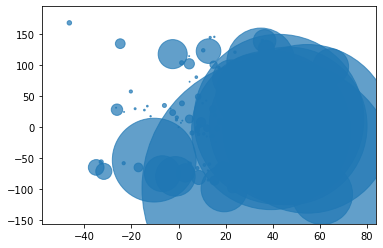

In [46]:
%%time

# Cargamos los datos del fichero COVID-19
data = pd.read_csv("data/COVID-19.csv")
# Sumamos las defunciones por país
deaths_by_country = data.groupby(["countriesAndTerritories"])["deaths"].sum()
# Obtenemos las coordenadas, paralelizando el trabajo con 4 procesos
countries_coords = get_coords_multiproc(deaths_by_country.index, num_processes=4) 
# Mostramos los resultados
plot_results(deaths_by_country, countries_coords)

1.2. Implementad un programa *multithreaded* que genere el *scatter plot* especificado. Para hacerlo, pensad qué tareas pueden ejecutarse en diferentes *threads*, y qué herramientas pdoéis utilizar para evitar las interferencias entre los *threads*.

En este caso, utilizaremos una implementación similar a la versión multiproceso:
* Mantendremos el uso de la `JoinableQueue` para coordinar las tareas de los diferentes procesos.
* No nos será necesario usar una cola de resultados, ya que los *threads* comparten variables. Por lo tanto, vamos a crear directamente un diccionario de resultados `countries_coords`, y los *threads* escribirán directamente los resultados que vayan obteniendo. Usaremos un `lock` para evitar interferencias en la actualización del diccionario.

In [47]:
def get_coords_thr(t_index, countries_q, lock, countries_coords):
    """
    Obtiene tareas (países de los que queremos saber las coordenadas)
        de la cola `countries_q`, realiza las tareas y guarda los
        resultados en el diccionario `countries_coords`.

    Finaliza cuando ya no hay tareas a realizar.
    """
    logging.info("[T{}]\tStarted".format(t_index))

    # Obtenemos la primera tarea
    country = countries_q.get()
    # Mientras haya tareas pendientes, las realizamos
    while country:
        logging.info("[T{}]\tStarting to work on {}".format(t_index, country))
        r = get_geo_cords(country)
        logging.info("[T{}]\tResult is {}".format(t_index, r))
        # Guardamos el resultado en el diccionario de resultados, obteniendo
        # primero el lock, y liberándolo cuando acabemos la actualización
        lock.acquire()
        countries_coords[country] = r
        lock.release()
        # Indicamos que hemos finalizado la tarea
        countries_q.task_done()
        # Obtenemos la próxima tarea
        country = countries_q.get()

    logging.info("[T{}]\tEnding".format(t_index))
    # Indicamos que hemos finalizado la última tarea obtenida de la cola
    # (que era None, el marcador de final de tareas)
    countries_q.task_done()
    logging.info("[T{}]\tThread ended".format(t_index))


def get_coords_multithr(countries, num_threads, lock, countries_coords):
    """
    Obtiene las coordenadas geográficas de una lista de países, utilizando
        `num_threads` threads para la obtención de los datos.
    """

    # Creamos la cola de tareas a realizar
    countries_q = JoinableQueue()
    # Añadimos los países a la cola de tareas
    for country in countries:
        countries_q.put(country)

    # Añadimos un indicador de final de tarea al final de la lista
    # de tareas para cada thread
    for _ in range(num_threads):
        countries_q.put(None)

    # Iniciamos los `num_threads` hilos con la tarea de obtener
    # las coordenadas y pasando la cola como parámetro
    for i in range(num_threads):
        thread = Thread(target=get_coords_thr,
                        args=(i, countries_q, lock, countries_coords))
        thread.start()

    # Esperamos a que se hayan completado todas las tareas
    logging.info("[M]\tWaiting to join threads")
    countries_q.join()
    logging.info("[M]\tThreads joined!")

[3372]	15:27:39 INFO: [T0]	Started
[3372]	15:27:39 INFO: [T0]	Starting to work on Afghanistan
[3372]	15:27:39 INFO: [T1]	Started
[3372]	15:27:39 INFO: [T1]	Starting to work on Albania
[3372]	15:27:39 INFO: [T2]	Started
[3372]	15:27:39 INFO: [T2]	Starting to work on Algeria
[3372]	15:27:39 INFO: [M]	Waiting to join threads
[3372]	15:27:39 INFO: [T3]	Started
[3372]	15:27:39 INFO: [T3]	Starting to work on Andorra
[3372]	15:27:40 INFO: [T0]	Result is (33.7680065, 66.2385139)
[3372]	15:27:40 INFO: [T0]	Starting to work on Angola
[3372]	15:27:40 INFO: [T3]	Result is (42.5407167, 1.5732033)
[3372]	15:27:40 INFO: [T3]	Starting to work on Anguilla
[3372]	15:27:40 INFO: [T1]	Result is (41.000028, 19.9999619)
[3372]	15:27:40 INFO: [T1]	Starting to work on Antigua_and_Barbuda
[3372]	15:27:40 INFO: [T2]	Result is (28.0000272, 2.9999825)
[3372]	15:27:40 INFO: [T2]	Starting to work on Argentina
[3372]	15:27:40 INFO: [T1]	Result is (17.05, -61.8)
[3372]	15:27:40 INFO: [T1]	Starting to work on Armenia


[3372]	15:27:48 INFO: [T0]	Result is (-51.75, -59.16667)
[3372]	15:27:48 INFO: [T0]	Starting to work on France
[3372]	15:27:48 INFO: [T1]	Result is (62.0, -7.0)
[3372]	15:27:48 INFO: [T1]	Starting to work on French_Polynesia
[3372]	15:27:48 INFO: [T3]	Result is (-18.1239696, 179.0122737)
[3372]	15:27:48 INFO: [T3]	Starting to work on Gabon
[3372]	15:27:48 INFO: [T2]	Result is (63.2467777, 25.9209164)
[3372]	15:27:48 INFO: [T2]	Starting to work on Gambia
[3372]	15:27:48 INFO: [T1]	Result is (-15.0, -140.0)
[3372]	15:27:48 INFO: [T1]	Starting to work on Georgia
[3372]	15:27:48 INFO: [T0]	Result is (46.603354, 1.8883335)
[3372]	15:27:48 INFO: [T0]	Starting to work on Germany
[3372]	15:27:48 INFO: [T3]	Result is (-0.8999695, 11.6899699)
[3372]	15:27:48 INFO: [T3]	Starting to work on Ghana
[3372]	15:27:49 INFO: [T2]	Result is (13.470062, -15.4900464)
[3372]	15:27:49 INFO: [T2]	Starting to work on Gibraltar
[3372]	15:27:49 INFO: [T1]	Result is (41.6809707, 44.0287382)
[3372]	15:27:49 INFO: [

[3372]	15:27:58 INFO: [T3]	Starting to work on Niger
[3372]	15:27:58 INFO: [T0]	Result is (-46.4108596, 168.3516142)
[3372]	15:27:58 INFO: [T0]	Starting to work on Nigeria
[3372]	15:27:58 INFO: [T2]	Result is (52.5001698, 5.7480821)
[3372]	15:27:58 INFO: [T2]	Starting to work on North_Macedonia
[3372]	15:27:58 INFO: [T3]	Result is (17.7356214, 9.3238432)
[3372]	15:27:58 INFO: [T3]	Starting to work on Northern_Mariana_Islands
[3372]	15:27:59 INFO: [T1]	Result is (12.6090157, -85.2936911)
[3372]	15:27:59 INFO: [T1]	Starting to work on Norway
[3372]	15:27:59 INFO: [T0]	Result is (9.6000359, 7.9999721)
[3372]	15:27:59 INFO: [T0]	Starting to work on Oman
[3372]	15:27:59 INFO: [T2]	Result is (41.66667, 21.75)
[3372]	15:27:59 INFO: [T2]	Starting to work on Pakistan
[3372]	15:27:59 INFO: [T3]	Result is (15.214, 145.756)
[3372]	15:27:59 INFO: [T3]	Starting to work on Palestine
[3372]	15:27:59 INFO: [T1]	Result is (64.5731537, 11.5280364)
[3372]	15:27:59 INFO: [T1]	Starting to work on Panama
[33

[3372]	15:28:07 INFO: [T2]	Result is (16.3471243, 47.8915271)
[3372]	15:28:07 INFO: [T2]	Ending
[3372]	15:28:07 INFO: [T2]	Thread ended
[3372]	15:28:07 INFO: [T1]	Result is (-14.5186239, 27.5599164)
[3372]	15:28:07 INFO: [T1]	Ending
[3372]	15:28:07 INFO: [T1]	Thread ended
[3372]	15:28:07 INFO: [T0]	Result is (-18.4554963, 29.7468414)
[3372]	15:28:07 INFO: [T0]	Ending
[3372]	15:28:07 INFO: [T0]	Thread ended
[3372]	15:28:07 INFO: [M]	Threads joined!
CPU times: user 2.54 s, sys: 2.76 s, total: 5.3 s
Wall time: 28.5 s


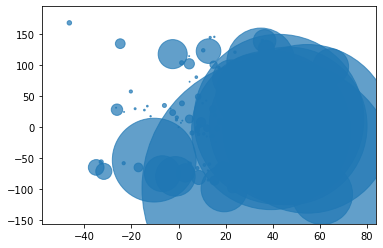

In [48]:
%%time

# Cargamos los datos del fichero Covid-19
data = pd.read_csv("data/COVID-19.csv")
# Sumamos las defunciones por país
deaths_by_country = data.groupby(["countriesAndTerritories"])["deaths"].sum()
# Obtenemos las coordenadas, paralelizando el trabajo con 4 threads
lock = Lock()
countries_coords = {}
get_coords_multithr(deaths_by_country.index, 4, lock, countries_coords) 
# Mostramos los resultados
plot_results(deaths_by_country, countries_coords)

1.3. Reflexionad sobre cuál de las dos implementaciones debería ser la más eficiente para resolver el problema planteado.


Experimentalmente podemos comprobar como el tiempo de ejecución de ambas versiones es muy similar (27.8 segundos para la ejecución original del *notebook*).

Conceptualmente, la tarea que ejecutamos en los múltiples hilos o procesos es una tarea limitada por la red (ya sea por el ancho de banda de nuestra máquina o por el tiempo de respuesta del servidor), y que requiere de muy poco cálculo de CPU. Por lo tanto, tanto la ejecución paralela en varios procesos como la concurrente en una única CPU tienen un tiempo de ejecución similar, limitada por la red y no por la CPU. Si hilamos delgado, podríamos decir que la versión *multithreaded* genera menos *overhead* (crear *threads* es más rápido que crear procesos), pero para la ejecución concreta que hemos realizado, esto no llega a tener un impacto notable en el rendimiento. También podríamos decir que la versión multiproceso aprovecha mejor los recursos de la máquina (ya que ejecuta, paralelamente, varias llamadas a la API), pero de nuevo esto no tiene un impacto significativo, ya que el tiempo de cálculo de CPU que requiere esta aplicación es mínimo.


# 5.- Bibliografía


## 5.1.- Bibliografía básica

La bibliografía básica de esta unidad es el contenido explicado en el notebook (no es necesario consultar ningún enlace externo).


## 5.2.- Bibliografía adicional - Ampliación de conocimientos

En la introducción de esta unidad se ha simplificado un poco el detalle de cómo funciona la gestión de memoria en la ejecución de programas, ya que no es el objetivo principal de este módulo. Si estáis interesados en explorar en más detalle que diferencía, a nivel de sistema operativo, los *threads* de los procesos, os recomendamos visitar los enlaces siguientes ([1](https://www.youtube.com/watch?v=TRH2HupGkgI), [2](https://www.youtube.com/watch?v=PBb0NRvo96s), [3](https://www.youtube.com/watch?v=Dhf-DYO1K78), [4](https://www.youtube.com/watch?v=3WmNGc9qP0g), [5](https://www.youtube.com/watch?v=X668LfXObaM)).


En esta unidad se ha presentado una introducción a la programación multiproceso y *multithread*, revisando algunas de las principales herramientas que ofrece Python en este contexto. Ahora bien, ¡esto es sólo una pequeña muestra! Si estáis interesados en conocer otras herramientas para realizar programación concurrente y paralela en Python, os recomendamos explorar otras herramientas de la librería [`multiprocessing`](https://docs.python.org/3/library/multiprocessing.html) como las *pools* de procesos ([1](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.Pool), [2](https://sebastianraschka.com/Articles/2014_multiprocessing.html)); el uso de semáforos, eventos y *conditions* de la librería [`threading`](https://docs.python.org/3.8/library/threading.html) ([1](https://hackernoon.com/synchronization-primitives-in-python-564f89fee732)); o la librería [asyncio](https://docs.python.org/3/library/asyncio.html). Si preferís la consulta en formato libro (en vez de enlaces), os recomendamos la lectura de los capítulos del 1 hasta el 4 del libro *Python Parallel Programming Cookbook*, de Giancarlo Zaccone.

Hemos visto como el módulo multiprocessing ofrece un par de clases, [`Value`](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Value) y [`Array`](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Array), que representan objetos que se asignan en un espacio de memoria compartida entre los diversos procesos. [`Value`](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Value) devuelve un objeto de tipo` ctype`, que ofrece tipos de datos compatibles con C. Podéis revisar los tipos de datos que ofrece en el [siguiente enlace](https://docs.python.org/3/library/ctypes.html#fundamental-data-types).


Aunque no era el objetivo principal de esta unidad, en este notebook hemos utilizado el módulo [`logging`](https://docs.python.org/3/library/logging.html) para crear *logs* que registraban qué estaban haciendo los diferentes hilos y procesos en cada momento. Recomendamos la lectura de los tutoriales oficiales (tanto el [básico](https://docs.python.org/3/howto/logging.html#logging-basic-tutorial) como el más [avanzado](https://docs.python.org/3/howto/logging.html#logging-advanced-tutorial)) para conocer las funcionalidades de este módulo, que pueden ser útiles no sólo para seguir el flujo de ejecución de programas *multithreaded* o multiproceso, sino también para monitorear cualquier tipo de programa.